<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Copy_of_ComputerVission_Image_Classificstion_sub_classing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up: Importing the needed modules and libraries


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.layers import Layer
import tensorflow as tf
from tensorflow.keras import layers
import keras
from tensorflow.keras.models import Sequential
from PIL import Image
from IPython.display import display
from IPython.display import display, HTML
import io
import base64
import sys
from os import listdir
import pathlib

#We have the following classes of images


In [3]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos.tar',
                                   dataset_url,
                                   untar=True,
                                   extract = True,
                                   cache_dir = '.',
                                   cache_subdir = '')
data_dir = pathlib.Path(data_dir).with_suffix('')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)



228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
3670


In [4]:
listdir(data_dir)

['sunflowers', 'dandelion', 'LICENSE.txt', 'tulips', 'daisy', 'roses']

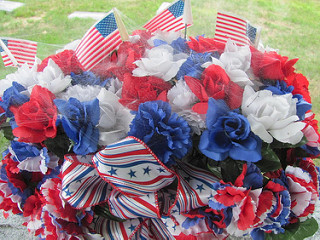

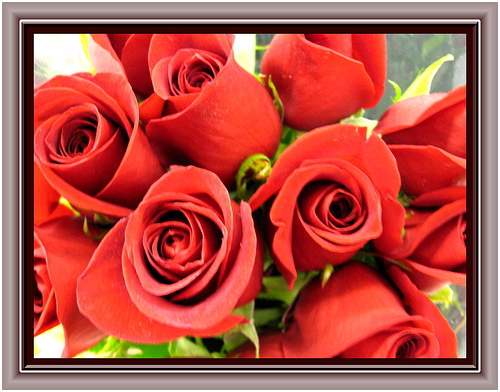

In [9]:
#View some roses
for i in range(2):
  roses = list(data_dir.glob('roses/*'))
  rose_image = PIL.Image.open(str(roses[i]))
  display(rose_image)

#Load data using a Keras utility

In [12]:
batch_size = 32
image_height = 180
image_width=180

#Fetch the training set
training_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = (image_height, image_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'training',

)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
#Fetch the validation set
validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = (image_height, image_width),
    validation_split = 0.2,
    subset = 'validation',
    seed=123
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = training_data.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_data = validation_set.cache().prefetch(buffer_size = AUTOTUNE)

In [15]:
class_names = training_data.class_names
number_of_classes = len(class_names)
print(number_of_classes)

5


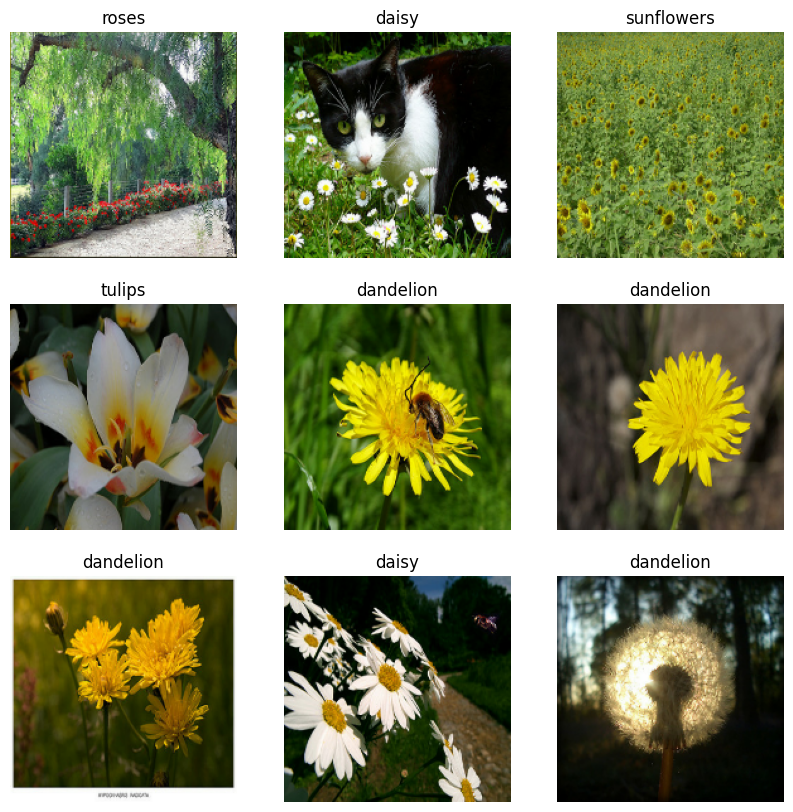

In [29]:

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Model Definition

In [57]:
class normalizer(Layer):
  def __init__(self, target_shape = (180, 180)):
    super(normalizer, self).__init__()
    self.target_shape = target_shape
  def call(self, inputs):
    resized_image = tf.image.resize(inputs, self.target_shape)
    scaled_image = resized_image/255
    return scaled_image


In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Normalizer(Layer):
    def __init__(self, target_shape=(180, 180)):
        super(Normalizer, self).__init__()
        self.target_shape = target_shape

    def call(self, inputs):
        resized_image = tf.image.resize(inputs, self.target_shape)
        scaled_image = resized_image / 255.0
        return scaled_image

class MyModel(tf.keras.Model):
    def __init__(self, number_of_classes):  # Use number_of_classes
        super(MyModel, self).__init__()
        self.resizer_scalar = Normalizer(target_shape=(180, 180))
        self.conv1 = tf.keras.layers.Conv2D(16, 3, activation='relu')
        self.pool1 = tf.keras.layers.MaxPooling2D()
        self.conv2 = tf.keras.layers.Conv2D(32, 3, activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D()
        self.conv3 = tf.keras.layers.Conv2D(64, 3, activation='relu')
        self.pool3 = tf.keras.layers.MaxPooling2D()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(128, activation='relu')
        self.d2 = tf.keras.layers.Dense(number_of_classes, activation='softmax')  # Use number_of_classes

    def call(self, x):
        x = self.resizer_scalar(x)
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)  # Return softmax output

# Example usage
number_of_classes = 5
model = MyModel(number_of_classes=number_of_classes)  # Pass the number of classes

# Build the model with an input shape
input_shape = (None, 180, 180, 3)
model.build(input_shape)

# Display the model summary
model.summary()


In [66]:
# Define the custom normalizer layer
class Normalizer(Layer):
    def __init__(self, target_shape=(180, 180)):
        super(Normalizer, self).__init__()
        self.target_shape = target_shape

    def call(self, inputs):
        resized_image = tf.image.resize(inputs, self.target_shape)
        scaled_image = resized_image / 255.0
        return scaled_image

# Define the custom model
class MyModel(tf.keras.Model):
    def __init__(self, number_of_classes):
        super(MyModel, self).__init__()
        self.resizer_scalar = Normalizer(target_shape=(180, 180))
        self.conv1 = tf.keras.layers.Conv2D(16, 3, activation='relu')
        self.pool1 = tf.keras.layers.MaxPooling2D()
        self.conv2 = tf.keras.layers.Conv2D(32, 3, activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D()
        self.conv3 = tf.keras.layers.Conv2D(64, 3, activation='relu')
        self.pool3 = tf.keras.layers.MaxPooling2D()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(128, activation='relu')
        self.d2 = tf.keras.layers.Dense(number_of_classes, activation='softmax')

    def call(self, x):
        x = self.resizer_scalar(x)
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# Define the number of classes
number_of_classes = 5

# Create an instance of the model
input_shape = (180, 180, 3)
inputs = tf.keras.Input(shape=input_shape)
model = MyModel(number_of_classes=number_of_classes)

# Build the model by calling it with the inputs
outputs = model(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary to check layer details
model.summary()

# Print details of each layer within the custom model
print("\nLayer Details:")
for layer in model.layers:
    print(f"Layer name: {layer.name}")
    print(f"Layer type: {type(layer).__name__}")
    try:
        print(f"Number of parameters: {layer.count_params()}")
    except AttributeError:
        print(f"Number of parameters: Not applicable")

    try:
        print(f"Output shape: {layer.output_shape}")
    except AttributeError:
        print(f"Output shape: Not applicable")

    print()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_model_11 (MyModel)                │ (None, 5)                   │       3,301,157 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,301,157 (12.59 MB)

 Trainable params: 3,301,157 (12.59 MB)

 Non-trainable params: 0 (0.00 B)


Layer Details:
Layer name: input_layer_4
Layer type: InputLayer
Number of parameters: 0
Output shape: Not applicable

Layer name: my_model_11
Layer type: MyModel
Number of parameters: 3301157
Output shape: Not applicable



In [67]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [68]:

epochs=10
model.fit(
  training_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3363 - loss: 1.4798 - val_accuracy: 0.5586 - val_loss: 1.1091
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5860 - loss: 1.0264 - val_accuracy: 0.6417 - val_loss: 0.9618
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6708 - loss: 0.8662 - val_accuracy: 0.6240 - val_loss: 0.9487
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 973ms/step - accuracy: 0.7386 - loss: 0.7092 - val_accuracy: 0.6540 - val_loss: 0.9173
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8055 - loss: 0.5138 - val_accuracy: 0.6880 - val_loss: 0.8834
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 993ms/step - accuracy: 0.8870 - loss: 0.3119 - val_accuracy: 0.6771 - val_loss: 1.0089
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 983ms/step - accuracy: 0.9300 - loss: 0.2020 - val_accuracy: 0.6540 - val_loss: 1.2183
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9741 - loss: 0.0976 - val_accuracy: 0.6935 - val_los